In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pwd

'/home/thura/Desktop/computer-vision-and-DL/CV-course1/9 - Cornor Detection'

In [3]:
I_org = plt.imread('/home/thura/Desktop/computer-vision-and-DL/CV-course1/9 - Cornor Detection/images/3.jpg')
I = cv2.cvtColor(I_org,cv2.COLOR_RGB2GRAY)

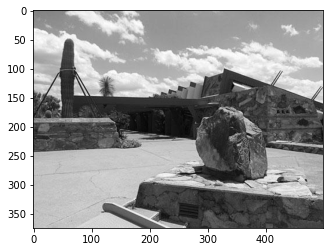

In [4]:
plt.imshow(I,cmap='gray')

In [5]:
numRows , numCols = I.shape[0] , I.shape[1]

In [12]:
directions = {'left':(0,-1),
             'right':(0,1),
             'up':(-1,0),
             'down':(1,0),
             'up_left':(-1,-1),
             'up_right':(-1,1),
             'down_left':(1,-1),
             'down_right':(1,1)}

In [13]:
C = np.zeros(I.shape)
for i in range(2,numRows-2):
    for j in range(2,numCols-2):
        minSSD = -1
        for d in directions.values():
            u , v = d[0] , d[1]
            P1 = I[i-1:i+2,j-1:j+2]
            P2 = I[i+u-1:i+u+2,j+v-1:j+v+2]
            ssd = np.sum((P1-P2)**2)
            if minSSD == -1:
                minSSD = ssd
            elif ssd < minSSD:
                minSSD = ssd
        C[i,j] = minSSD

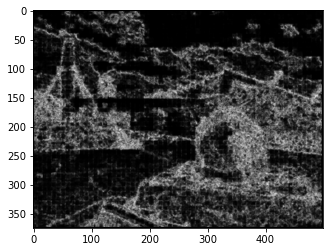

In [14]:
plt.imshow(C, cmap='gray')

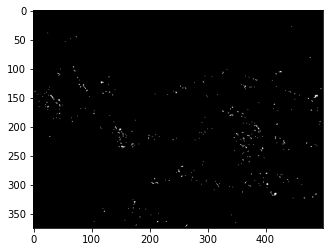

In [15]:
th = C.mean()+3*C.std()
C_image = C>th
plt.imshow(C_image,cmap='gray')

In [16]:
th

826.3524820853589

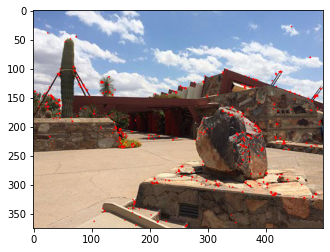

In [17]:
I2 = I_org[:,:,::-1]
idx = np.argwhere(C_image)
r,c = idx[:,0],idx[:,1]
for i in range(len(r)):
    I2 = cv2.circle(np.float32(I2),(c[i],r[i]),radius=1,color=(0,0,255),thickness=-1)
plt.imshow(np.array(I2[:,:,::-1],np.uint8))

In [18]:
I = np.float64(I)
mask_x = np.array([[-1],[1]])
Ix = cv2.filter2D(I,-1,mask_x)
Iy = cv2.filter2D(I,-1,mask_x.T)
Ix2 , Iy2 , IxIy = Ix*Ix , Iy*Iy , Ix*Iy
K = np.ones((3,3))
sIx2 = cv2.filter2D(Ix2,-1,K)
sIy2 = cv2.filter2D(Iy2,-1,K)
sIxIy = cv2.filter2D(IxIy,-1,K)
L1 = ((sIx2+sIy2)+((sIx2+sIy2)**2 - 4*(IxIy**2))**0.5)/2
L2 = ((sIx2+sIy2)-((sIx2+sIy2)**2 - 4*(IxIy**2))**0.5)/2


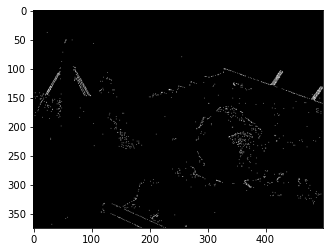

In [19]:
th = L2.mean()+3*L2.std()
C_image = L2>th
plt.imshow(C_image,cmap='gray')

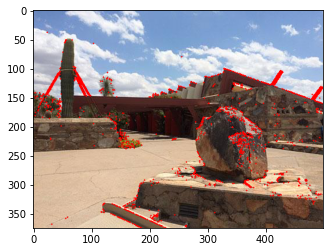

In [20]:
I2 = I_org[:,:,::-1]
idx = np.argwhere(C_image)
r,c = idx[:,0],idx[:,1]
for i in range(len(r)):
    I2 = cv2.circle(np.float32(I2),(c[i],r[i]),radius=1,color=(0,0,255),thickness=-1)
plt.imshow(np.array(I2[:,:,::-1],np.uint8))